In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("rainfall.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
df.head(0)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec


# Data Preparation for Predictions

In [4]:
features = []
for element in df.head(0):
    features.append(element)
features.remove('ANNUAL')
features.remove('JAN')
features.remove('FEB')
features.remove('MAR')
features.remove('APR')
features.remove('OCT')
features.remove('NOV')
features.remove('DEC')
features.remove('AUG')
features.remove('SEP')
features.remove('Jan-Feb')
features.remove('Mar-May')
features.remove('Jun-Sep')
features.remove('Oct-Dec')
print(features)

['SUBDIVISION', 'YEAR', 'MAY', 'JUN', 'JUL']


In [5]:
#Changing SUBDIVISION to unique numbers
df.SUBDIVISION.unique()
dictionary = {}
for c, value in enumerate(df.SUBDIVISION.unique(), 1):
#     print(c, value)
    dictionary[value] = c
print(dictionary)
df["SUBDIVISION"] = df.SUBDIVISION.map(dictionary)
df.head()

{'ANDAMAN & NICOBAR ISLANDS': 1, 'ARUNACHAL PRADESH': 2, 'ASSAM & MEGHALAYA': 3, 'NAGA MANI MIZO TRIPURA': 4, 'SUB HIMALAYAN WEST BENGAL & SIKKIM': 5, 'GANGETIC WEST BENGAL': 6, 'ORISSA': 7, 'JHARKHAND': 8, 'BIHAR': 9, 'EAST UTTAR PRADESH': 10, 'WEST UTTAR PRADESH': 11, 'UTTARAKHAND': 12, 'HARYANA DELHI & CHANDIGARH': 13, 'PUNJAB': 14, 'HIMACHAL PRADESH': 15, 'JAMMU & KASHMIR': 16, 'WEST RAJASTHAN': 17, 'EAST RAJASTHAN': 18, 'WEST MADHYA PRADESH': 19, 'EAST MADHYA PRADESH': 20, 'GUJARAT REGION': 21, 'SAURASHTRA & KUTCH': 22, 'KONKAN & GOA': 23, 'MADHYA MAHARASHTRA': 24, 'MATATHWADA': 25, 'VIDARBHA': 26, 'CHHATTISGARH': 27, 'COASTAL ANDHRA PRADESH': 28, 'TELANGANA': 29, 'RAYALSEEMA': 30, 'TAMIL NADU': 31, 'COASTAL KARNATAKA': 32, 'NORTH INTERIOR KARNATAKA': 33, 'SOUTH INTERIOR KARNATAKA': 34, 'KERALA': 35, 'LAKSHADWEEP': 36}


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,1,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,1,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,1,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


# Handling the NA values

In [6]:
df.shape

(4116, 19)

In [7]:
df.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
features_1 = ['AUG']

In [10]:
# Separating out the features
x  = df.loc[:, features].values
# Separating out the target
y = df.loc[:,features_1].values

# Split the data into training set and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Dimensionality Reduction
Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.

In [12]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=4)
pca.fit(x)

PCA(n_components=4)

In [13]:
print(pca.explained_variance_ratio_)

[0.79961129 0.13708166 0.05500135 0.00766329]


In [14]:
print(pca.singular_values_)

[21646.78382965  8962.79770753  5677.28349079  2119.14945752]


In [16]:
pca.score(x,y)

-28.109682057097007

In the PCA analysis negative values of loadings of variable in the components of the PCA means the existence of an inverse correlation between the factor PCA and the variables.

In [17]:
pca.score_samples(x)

array([-34.59383444, -33.35279304, -29.40501404, ..., -29.68343251,
       -29.40966052, -29.27052782])

# Model 1 - Support Vector Machine (SVM)

In [18]:
from sklearn import svm
from sklearn.datasets import make_classification
clf = svm.SVC()
X_train, y_train = make_classification()
X_test, y_test = make_classification()
clf.fit(X_train, y_train)

SVC()

In [19]:
print(clf.intercept_)

[-0.14376855]


In [20]:
clf.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [22]:
clf.score(X_test, y_test, sample_weight=None)

0.46

In [24]:
y_score = clf.decision_function(X_test)

In [25]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.5053047193191118


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.51')

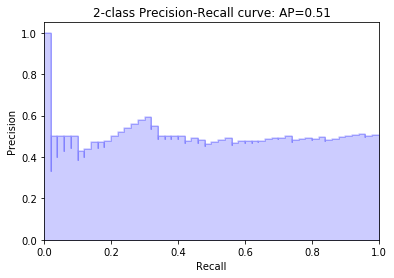

In [28]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

# Model 2 - Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.47

# Model 3 - Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.51

# Model 4 - MLP Classifier
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.49